In [1]:
#importing the libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import random
import warnings
%matplotlib inline

In [2]:
#importing the dataset
data = pd.read_csv(r'C:\Users\krish\anaconda3\csv\housing.csv')
#data.head()
print(data)
X = data.iloc[:, [0,11]]
Y = data.iloc[:, 12]

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  B:1000  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
from sklearn import datasets
# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data


In [4]:
# Number of houses in the dataset
total_houses = housing_prices.size

# Number of features in the dataset
# Note: this is just the number of features per data point, should be 13
total_features = housing_features[0].size

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print ("Total number of houses:", total_houses)
print ("Total number of features:", total_features)
print ("Mean house price: {0:.3f}".format(mean_price))
print ("Median house price:", median_price)
print ("Standard deviation of house price: {0:.3f}".format(std_dev))

Total number of houses: 506
Total number of features: 13
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


In [5]:
#find missing values,if any
data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B:1000,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
#Missing Data Percentage List
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ZN - 0%
INDUS - 0%
CHAS - 0%
NOX - 0%
AGE - 0%
DIS - 0%
RAD - 0%
TAX - 0%
PTRATIO - 0%
B:1000 - 0%
LSTAT - 0%
MEDV - 0%
CRIM - 0%
RM - 0%


Feature: 0, Score: 72.65877
Feature: 1, Score: 37.47138
Feature: 2, Score: 0.00000
Feature: 3, Score: 96.34528
Feature: 4, Score: 9.09653
Feature: 5, Score: 40.20556
Feature: 6, Score: 65.23618
Feature: 7, Score: -0.00000
Feature: 8, Score: 64.45327
Feature: 9, Score: 37.73911
Feature: 10, Score: 29.97904
Feature: 11, Score: -0.00000
Feature: 12, Score: 45.03619


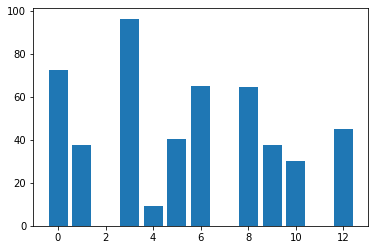

In [6]:
# linear regression for feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, Y = make_regression(n_samples=1000, n_features=13, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [43]:
#removing duplicate rows
data1 = data.drop_duplicates()
print(data1.shape)

(506, 14)


Feature: 0, Score: 0.49351
Feature: 1, Score: -0.41169
Feature: 2, Score: 0.27253
Feature: 3, Score: 0.18284
Feature: 4, Score: -0.52518
Feature: 5, Score: 0.04419
Feature: 6, Score: 0.06553
Feature: 7, Score: -0.64818
Feature: 8, Score: -0.01596
Feature: 9, Score: -0.11633
Feature: 10, Score: 0.09287
Feature: 11, Score: -0.46256
Feature: 12, Score: 0.16161


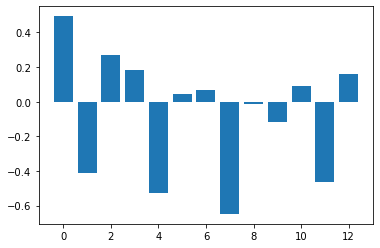

In [8]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, Y = make_classification(n_samples=1000, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
data.dtypes

ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B:1000     float64
LSTAT      float64
MEDV       float64
CRIM       float64
dtype: object

In [7]:
#pre processing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scaler.fit_transform(X)

In [8]:
#shuffling the data
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B:1000,LSTAT,MEDV
0,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
1,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
2,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188,19.1,370.31,25.41,17.3
3,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
4,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,17.1


In [9]:
from sklearn.model_selection import train_test_split

def shuffle_split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    return X_train, y_train, X_test, y_test
print (X_train.shape , y_train.shape)
print (X_test.shape, y_test.shape)

NameError: name 'X_train' is not defined

In [10]:
#Splitting the dataset into the Training set and Test set to 80 and 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)
print (X_train.shape , y_train.shape)
print (X_test.shape, y_test.shape)

(800, 13) (800,)
(200, 13) (200,)


In [11]:
# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print ("Successfully shuffled and split the data!")
except:
    print ("Something went wrong with shuffling and splitting the data.") 

Successfully shuffled and split the data!


In [12]:
#ignore all caught warnings   
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=42, shuffle=True)
print ("Train Set                                            Test Set         ")
for train_set,test_set in cv.split(X):
    print(train_set , test_set)

Train Set                                            Test Set         
[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37  38
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57  58
  60  61  62  64  65  68  69  71  72  73  74  75  77  78  79  80  81  82
  83  84  85  86  87  89  90  91  92  93  94  95  97  98  99 100 102 103
 104 105 106 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 137 138 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 199 200 201 202 203 204 205 206 207 208 211 212 213 214 215 216 217 219
 220 222 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 

In [38]:
#Principal component Analysis 
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

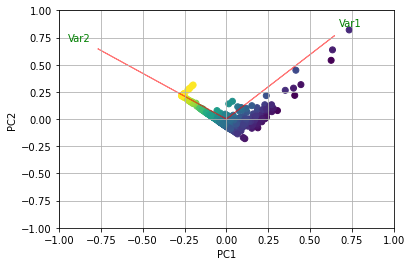

In [41]:
#PCA analysis
import matplotlib.pyplot as plt
X = data.iloc[:, [0,13]]
y = data.iloc[:, -1]
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [42]:
pca.explained_variance_ratio_


array([0.69658028, 0.30341972])

In [13]:
#Linear Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
lm.intercept_

34.244837033907224

In [15]:
y_pred = lm.predict(X_train)

In [16]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7495400632086622
Adjusted R^2: 0.7399636538607581
MAE: 3.0892475382734004
MSE: 19.45968013480259
RMSE: 4.411312745068365


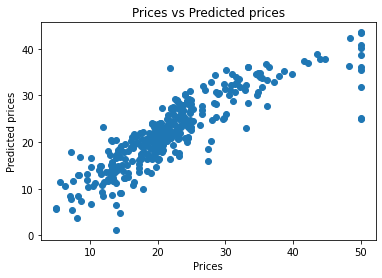

In [17]:
from matplotlib import pyplot as plt
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [18]:
y_test_pred = lm.predict(X_test)

In [19]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


R^2: 0.7495400632086622
Adjusted R^2: 0.7399636538607581
MAE: 3.0892475382734004
MSE: 19.45968013480259
RMSE: 4.411312745068365


In [20]:
#SVM Regressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
reg = svm.SVR()

In [22]:
reg.fit(X_train, y_train)

SVR()

In [23]:
y_pred = reg.predict(X_train)

In [24]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6620100538137379
Adjusted R^2: 0.6490869088124984
MAE: 2.8459607822333
MSE: 26.260392483622446
RMSE: 5.124489485170445


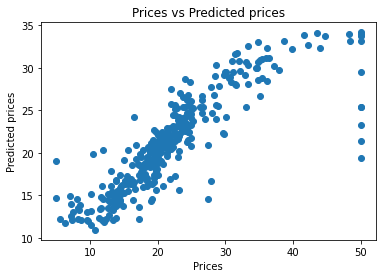

In [25]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [26]:
y_test_pred = reg.predict(X_test)

In [27]:
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5688619672221285
Adjusted R^2: 0.5282475148589956
MAE: 3.8859918739953647
MSE: 42.09350123961824
RMSE: 6.487950465256207


In [28]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
y_pred = reg.predict(X_train)

In [30]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.978974725817047
Adjusted R^2: 0.9781708182747576
MAE: 0.8225621468926546
MSE: 1.633575076271188
RMSE: 1.2781138745319949


In [31]:
y_test_pred = reg.predict(X_test)

In [32]:
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.880761434030988
Adjusted R^2: 0.8695288154976754
MAE: 2.3826381578947355
MSE: 11.641674690789463
RMSE: 3.411989843301041


In [33]:
#Ridge Regressor
from sklearn.linear_model import Ridge
reg = Ridge()
reg.fit(X_train, y_train)

Ridge()

In [34]:
y_pred = reg.predict(X_train)

In [35]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7495127040621026
Adjusted R^2: 0.739935248629183
MAE: 3.084011527171065
MSE: 19.46180582503326
RMSE: 4.411553674731076


In [36]:
y_test_pred = reg.predict(X_test)

In [37]:
acc_ridge = metrics.r2_score(y_test, y_test_pred)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7495127040621026
Adjusted R^2: 0.739935248629183
MAE: 3.084011527171065
MSE: 19.46180582503326
RMSE: 4.411553674731076


In [39]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'Random Forest', 'Ridge Regression'],
    'Accuracy': [acc_linreg*100, acc_svm*100, acc_rf*100, acc_ridge*100]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,88.076143
3,Ridge Regression,69.985022
0,Linear Regression,69.962558
1,Support Vector Machines,56.886197


In [64]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [65]:
print (linreg.intercept_)
print (linreg.coef_)

21.971186440677968
[-1.252809    1.56150248 -0.16861008  0.37449384 -1.7776332   2.23783886
  0.3168073  -3.27712377  2.69471035 -2.10285702 -1.74689193  1.22356691
 -3.83454078]
